<a href="https://colab.research.google.com/github/Alexandre77777/data_mining/blob/main/3.%20Random%20Forest/%D0%A2%D0%B5%D0%BE%D1%80%D0%B8%D1%8F/%D0%A2%D0%B5%D0%BE%D1%80%D0%B8%D1%8F_%E2%84%965_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Теория №5. Случайный лес (Random Forest)**

Решающие деревья для задач классификации и регрессии редко используются в чистом виде. Однако они популярны в ансамблевых методах, таких как бэггинг и бустинг:

- **Бэггинг** (от английского *bootstrap aggregating*) — это метод ансамблевого обучения, при котором несколько моделей (обычно одного типа) обучаются параллельно на разных подвыборках исходных данных, полученных методом бутстрепа (случайной выборки с возвращением). Предсказания этих моделей затем объединяются (например, путем усреднения или голосования), что снижает обобщенную ошибку модели за счет уменьшения вариативности.

- **Бустинг** — это метод ансамблевого обучения, в котором модели обучаются последовательно, и каждая следующая модель стремится исправить ошибки предыдущих. На каждом шаге обучению уделяется больше внимания тем данным, на которых предыдущие модели ошибались. Итоговый прогноз получается путем взвешенного объединения предсказаний всех моделей. Бустинг позволяет повысить точность модели за счет последовательного усиления слабых моделей.

**В этом занятии мы рассмотрим бэггинг с использованием деревьев.**

- **Ансамбль в машинном обучении** — метод, объединяющий прогнозы нескольких моделей для повышения точности и стабильности результата.

- Основная идея ансамблей состоит в комбинировании прогнозов нескольких базовых моделей (базовых алгоритмов или участников ансамбля). При правильном применении ансамбли обычно дают более точные прогнозы, чем отдельные базовые алгоритмы.

# **1. Основные сведения**

- **Random Forest (Случайный лес)** — алгоритм контролируемого обучения для задач классификации и регрессии. Это гибкий и простой в использовании метод, который строит множество деревьев решений на подвыборках данных, получает предсказания от каждого дерева и объединяет их путем голосования или усреднения. Random Forest также оценивает важность признаков.

- Алгоритм Random Forest объединяет несколько деревьев решений, образуя "лес", откуда и происходит название. В классификаторе Random Forest увеличение количества деревьев повышает точность модели.

# **2. Принцип алгоритма Random Forest**

Алгоритм Random Forest состоит из двух основных этапов.

**Этап 1: Построение случайного леса**

1. **Создание множества деревьев:**
   - Повторяем следующие шаги `n` раз для создания `n` деревьев в лесу:
     - **Случайная выборка признаков:**
       - Случайным образом выбираем подмножество из `k` признаков из общего числа `m` признаков, где `k < m`.
     - **Построение дерева решений:**
       - Используя выбранные `k` признаков, находим наилучшую точку разделения для текущего узла.
       - Разбиваем узел на дочерние узлы по этому разделению.
       - Повторяем процесс для каждого дочернего узла, пока не будут выполнены условия остановки (например, достигнута максимальная глубина или минимальное количество узлов `l`).



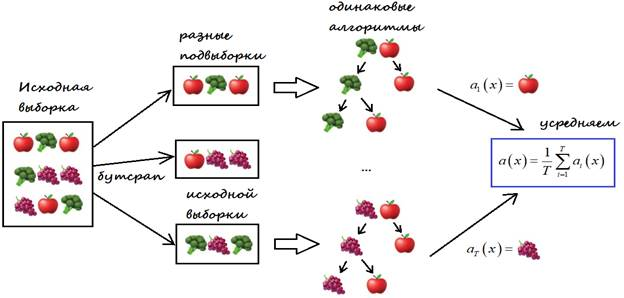

**Этап 2: Прогнозирование с помощью леса**

1. **Применение леса к новым данным:**
   - Для каждого нового примера данных пропускаем его через все `n` деревьев в лесу.
   - Получаем предсказание от каждого дерева.
2. **Объединение предсказаний:**
   - **Для классификации:**
     - Применяем голосование большинства и выбираем класс, который был предсказан большинством деревьев.
   - **Для регрессии:**
     - Вычисляем среднее значение предсказаний всех деревьев.

Таким образом, алгоритм Random Forest объединяет результаты множества деревьев решений, каждое из которых обучено на случайном подмножестве признаков, что позволяет улучшить точность и устойчивость модели.

![Random Forest](https://i.ytimg.com/vi/goPiwckWE9M/maxresdefault.jpg)

# **3. Достоинства и недостатки алгоритма Random Forest**

**Преимущества:**

- **Высокая точность прогнозов**: часто работает лучше линейных методов и сопоставим с бустингом.
- **Устойчивость к выбросам**: благодаря случайному выбору выборок методом бутстрэп-сэмплирования.
- **Нечувствительность к масштабированию признаков**: хорошо работает без нормализации данных.
- **Простота использования**: не требует тщательной настройки параметров и дает хорошие результаты "из коробки".
- **Эффективность на больших данных**: справляется с большим количеством признаков и классов.
- **Стойкость к переобучению**: добавление большего числа деревьев обычно улучшает модель.
- **Раота с пропущенными данными**: сохраняет точность даже при наличии пробелов в данных.
- **Возможности для анализа данных**: помогает в кластеризации, визуализации и обнаружении выбросов.
- **Легкость масштабирования**: можно увеличивать количество и глубину деревьев для улучшения модели.

**Недостатки:**

- **Сложность интерпретации**: результаты труднее понять по сравнению с одним деревом решений.
- **Неэффективность на разреженных данных**: хуже работает с данными, где много нулевых значений (например, в обработке текстов).
- **Отсутствие экстраоляции**: не умеет предсказывать значения за пределами обучающих данных, в отличие от линейной регрессии.
- **Возможность переобучения**: особенно на данных с большим количеством шума.
- **Предвзятость к признакам с многими категориями**: склонен уделять больше внимания признакам с большим числом уровней, что может искажать результаты.
- **Большой размер модели**: требует больше памяти для хранения большого количества деревьев (O(NK), где K – число деревьев).

[**Источник**](https://proproprogs.ru/ml/ml-sluchaynye-derevya-i-sluchaynyy-les-bootstrap-i-bagging)

# **4. Выбор признаков с помощью Random Forest**

**Random Forest** не только используется для предсказаний, но и помогает определить, какие признаки наиболее влияют на результат модели. Это делается путем оценки важности каждого признака.

**Основная идея**: признаки, которые чаще используются для разделения узлов в деревьях и значительно уменьшают неопределенность (например, энтропию), считаются более важными.

**Как работает процесс выбора признаков с помощью Random Forest:**

1. **Построение Random Forest**: создаётся множество решающих деревьев на обучающей выборке.

2. **Оценка важности признаков**: для каждого признака вычисляется его важноость на основе того, насколько сильно он уменьшает неопределенность при разделении узлов во всех деревьях леса.

3. **Ранжирование признаков**: признаки сортируются по убыванию их важности.

4. **Отбор признаков**: выбираются наиболее значимые признаки для дальнейшего использования в модели.

**Преимущества использования Random Forest для выбора признаков:**

- **Учет нелинейных взаимоотношений** между признаками.
- **Устойчивость к мультиколлинеарности** (когда признаки коррелируют между собой).
- **Интерпретируемость результатов** благодаря оценке важности каждого признака.
- **Сокращение размерности данных**, что может улучшить работу модели и снизить время обучения.




**Пример с кодом**

Рассмотрим пример использования Random Forest для оценки важности признаков на наборе данных Iris (ирисы Фишера).




,Feature,Importance
2,petal length (cm),0.436130
3,petal width (cm),0.436065
0,sepal length (cm),0.106128
1,sepal width (cm),0.021678


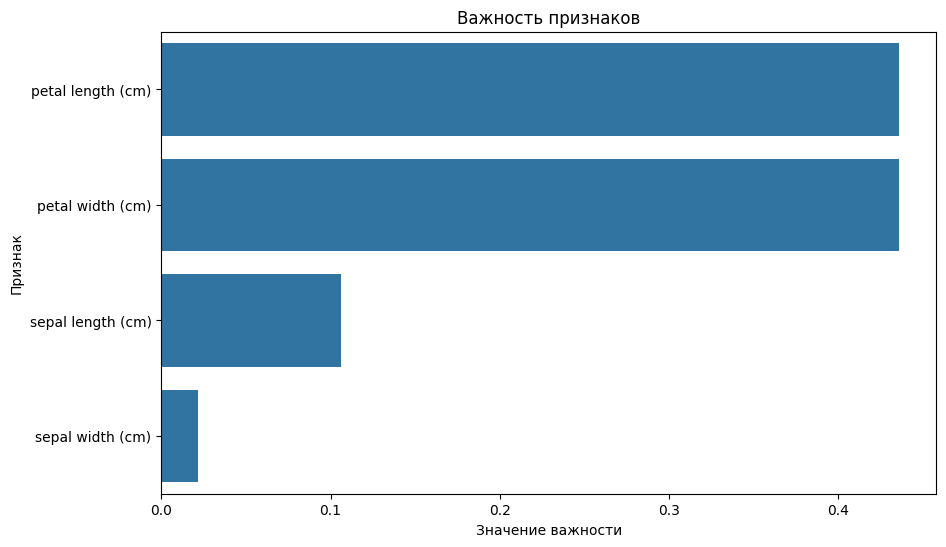

In [ ]:
# Подключаем необходимые библиотеки для работы с данными и визуализации
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

# Шаг 1: Загрузка данных
# Используем встроенный набор данных Iris из sklearn.datasets
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Преобраование в DataFrame
#
data = pd.DataFrame(X, columns=feature_names)
data['species'] = y

# Шаг 2: Обучение модели Random Forest
# Cоздаём и обучаем модель RandomForestClassifier с 100 деревьями
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(data[feature_names], data['species'])

# Шаг 3: Оценка важности признаков
# Значения "важностей" признаков содержатся в атрибуте `feature_importances_`.
importances = rf.feature_importances_
feat_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Сортировка признаков по важности
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
display(feat_importances)

# Шаг 4: Визуализация важности признаков
# Cтроим график, отображающий важность каждого признака
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importances)
plt.title('Важность признаков')
plt.xlabel('Значение важности')
plt.ylabel('Признак')
plt.show()

**Результат визуализации:**

График показывает, насколько каждый из признаков важен для модели при классификации видов ирисов. Обычно для данного набора данных наиболее важными признаками являются:

- **Petal length (длина лепестка)**
- **Petal width (ширина лепестка)**

Эти признаки значительно сильнее влияют на точность модели по сравнению с:

- **Sepal length (длина чашелистика)**
- **Sepal width (ширина чашелистика)**

**Вывод:**

Используя Random Forest для оценки важности признаков, мы можем:

- **Идентифицировать наиболее значимые признаки**, влияющие на результат модели.
- **Сократить количество признаков**, удалив менее важные, что может упростить модель и снизить риск переобучения.
- **Улучшить интерпретируемость модели**, сосредоточившись на ключевых факторах.



# **5. Разница между случайными лесами и деревьями решений**

- **Построение модели**: Дерево решений — это одиночная модель, которая разделяет данные на основе признаков для предсказания. Случайный лес — ансамбль деревьев решений, где каждое дерево обучается на случайном подмножестве данных и признаков.

- **Ансамбль**: В случайном лесе множество деревьев голосуют за итоговое предсказание. Дерево решений предсказывает результат самостоятельно.

- **Стабильность и переобучение**: Деревья решений могут переобучаться, точно подстраиваясь под обучающие данные. Случайный лес более устойчив к переобучению благодаря усреднению результатов разных деревьев.

- **Скорость работы**: Деревья решений обучаются быстрее, так как создаётся одна модель. Случайный лес обучается дольше из-за множества деревьев, но предсказания могут выполняться быстрее за счёт параллельной обработки.

**Итог**: Случайный лес обеспечивает более высокую точность и устойчивость к переобучению, но требует больше времени на обучение. Деревья решений проще и быстрее в обучении, но могут быть менее точными и склонными к переобучению.

# **6. Установка основных зависимостей**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# **7. Импорт датасета**

[Ссылка на датасет](https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set/download?datasetVersionNumber=1)

In [ ]:
!wget https://github.com/tester170/Other/raw/main/archive.zip
!unzip -o /content/archive.zip -d /content/

zsh:1: command not found: wget
unzip:  cannot find or open /content/archive.zip, /content/archive.zip.zip or /content/archive.zip.ZIP.


Датасет **car_evaluation.csv** представляет собой популярный набор данных для задач классификации в машинном обучении. Он содержит информацию об автомобилях с различными харатеристиками, и его цель — оценить общую приемлемость автомобиля на основе этих харатеристик.

**Признаки датасета:**

1. **buying**: ена покупки автомобиля.
   - Возможные значения: `vhigh` (очень высокая), `high` (высокая), `med` (средняя), `low` (низкая).

2. **maint**: Стоимость обслуживания автомобиля.
   - Возможные значения: `vhigh`, `high`, `med`, `low`.

3. **doors**: Количество дверей в автомобиле.
   - Возможные значения: `2`, `3`, `4`, `5more` (5 и более).

4. **persons**: Вместимость по количеству пассажиров.
   - Возможные значения: `2`, `4`, `more` (больше).

5. **lug_boot**: Размер багажника.
   - Возможные значения: `small` (маленький), `med` (средний), `big` (большой).

6. **safety**: Уровень безопасности автомобиля.
   - Возможные значения: `low` (низкий), `med` (средний), `high` (высокий).

7. **class**: Общая приемлемость автомобиля (целевой признак).
   - Возможные значения: `unacc` (неприемлемый), `acc` (приемлемый), `good` (хороший), `vgood` (очень хороший).

In [ ]:
data = '/content/car_evaluation.csv'

df = pd.read_csv(data, header=None)

# **8. Разведовательный анализ данных**


Получим представление о данных в датасете:

In [ ]:
df.shape

(1728, 7)

### Просмотр 5 первых строк набора данных

In [ ]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### Переименование столбцов

Видно, что столбцы именованы цифрами от 0 до 6.

Дадим каждому столбцу соответствующее имя:

In [ ]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [ ]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### Просмотр сводной информации о наборе данных

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


### Частотное распределение значений признаков

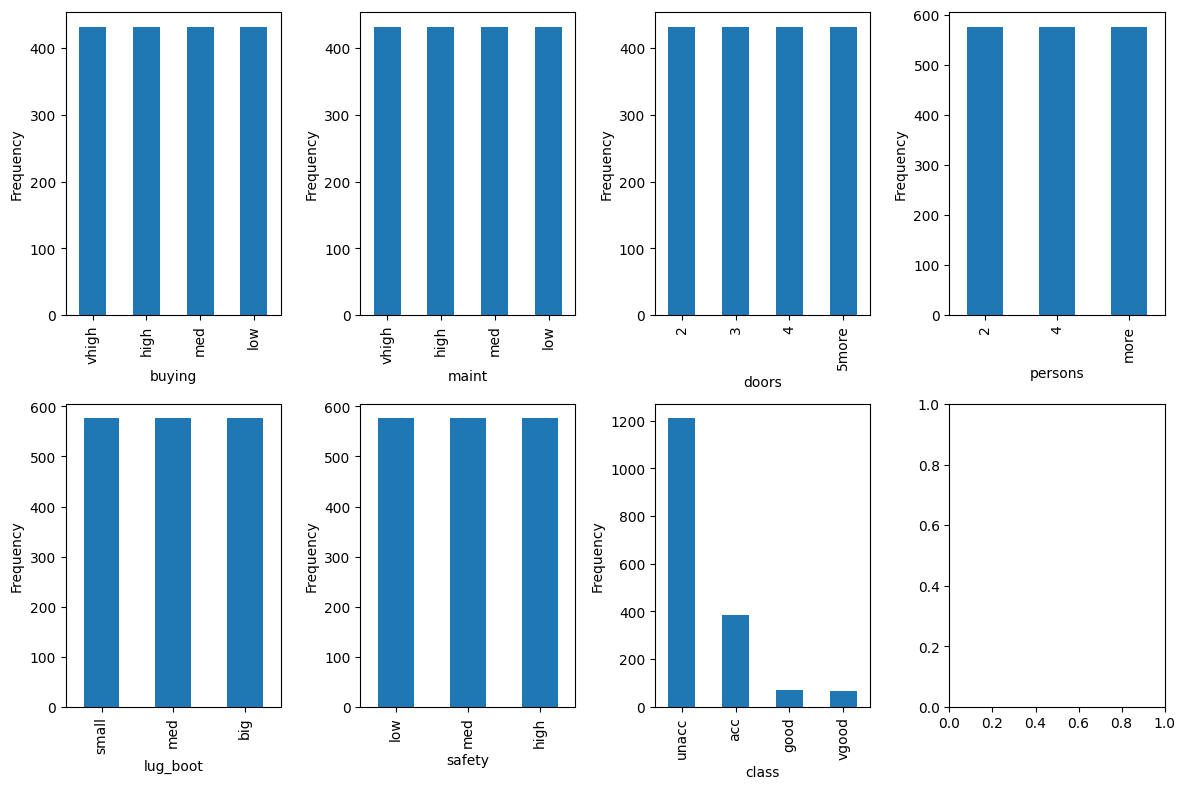

In [ ]:
import matplotlib.pyplot as plt

col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

fig, axs = plt.subplots(2, 4, figsize=(12, 8))

for i, col in enumerate(col_names):
    ax = axs[i // 4, i % 4]
    df[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Краткое описание признаков


- В наборе данных имеется 7 признаков. Все признаки имеют категориальный тип данных.

- Целевой переменной является `class`.

### Рассмотрим значения целевого столбца `class`:

In [ ]:
df['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

### Проверим датафрейм на содержание пустых ячеек

In [ ]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

Видно, что в наборе данных нет пропущенных значений.

# **9. Сформируем общую обучающую выборку:**

In [ ]:
X = df.drop(['class'], axis=1)

y = df['class']

# **10. Разделим общую выборку данных на обучающую и тестовую**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
X_train.shape, X_test.shape

((1157, 6), (571, 6))

# **11. Feature Engineering**


**Feature Engineering (Инженерия признаков)**  - это процесс преобразования исходных данных в полезные признаки, которые помогают нам лучше понять нашу модель и повысить ее предсказательную силу. Я проведу инженерию признаков для различных типов переменных.

In [ ]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

### Закодируем значения категориальных признаков в числовой формат

In [ ]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 838.2 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 2.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 7.0 MB/s eta 0:00:0000:010:01


In [ ]:
import category_encoders as ce

In [ ]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [ ]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [ ]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


Теперь у нас есть обучающий и тестовый наборы, готовые к построению модели.

# **12. Модель классификатора Random Forest с параметрами по умолчанию**

**RandomForestClassifier** - это классификатор, реализующий метод случайного леса. Он создает ансамбль решающих деревьев на основе случайной выборки признаков и случайной выборки объектов. Классификатор прогнозирует класс объекта, основываясь на голосовании решений деревьев.

Значения параметров классификатора RandomForestClassifier:

1. n_estimators - количество деревьев в случайном лесу (по умолчанию 100).
2. criterion - функция для измерения качества разбиения (по умолчанию "gini"). Возможные значения: "gini" и "entropy".
3. max_depth - максимальная глубина деревьев (по умолчанию None). Если None, то узлы будут расширяться до тех пор, пока все листы не станут однородными.
4. min_samples_split - минимальное количество образцов, необходимое для разделения внутреннего узла (по умолчанию 2).
5. min_samples_leaf - минимальное количество образцов, необходимое для быть листом (по умолчанию 1).
6. max_features - количество признаков, которые будут использоваться при делении (по умолчанию "auto"). Возможные значения: "auto", "sqrt", "log2" или целое число.
7. bootstrap - флаг, указывающий, должны ли образцы использоваться с повторениями при построении деревьев (по умолчанию True).
8. random_state - начальное состояние генератора случайных чисел (по умолчанию None).
9. n_jobs - количество параллельных задач для выполнения (по умолчанию None).

Для использования RandomForestClassifier необходимо создать экземпляр классификатора, указать необходимые параметры (если необходимо), а затем обучить модель на тренировочных данных с использованием метода fit(). После обучения, можно использовать методы predict() и predict_proba() для прогнозирования метки класса и вероятности соответствия классам соответственно.

**Инициализируем и обучаем классификатор Random Forest при использовании 10 деревьев решений**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10, random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

Произведем оценку точности:

In [ ]:
from sklearn.metrics import accuracy_score

print('Оценка точности модели при использовании 10 деревьев решений : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Оценка точности модели при использовании 10 деревьев решений : 0.9247


Теперь увеличим количество деревьев решений и посмотрим, как это повлияет на точность.

# **13. Модель классификатора Random Forest с параметром n_estimators=100**

In [ ]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
rfc_100.fit(X_train, y_train)
y_pred_100 = rfc_100.predict(X_test)

print('Оценка точности модели при использовании 100 деревьев решений : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Оценка точности модели при использовании 100 деревьев решений : 0.9457


Точность модели с 10 деревьями решений составляет 0.9247, а со 100 деревьями решений - 0,9457. Таким образом, как и ожидалось, точность увеличивается с ростом числа деревьев решений в модели.

# **14. Поиск важных признаков с помощью модели Random Forest**


До сих пор мы использовали все признаки, заданные в модели. Теперь оставим только важные и построим модель с использованием этих признаков, обратим внимание на то, как это повлияет на точность.


Создадим модель Random Forest следующим образом:

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

**Обратимся к атрибуту "feature_importances_" у объекта-классификатора "clf"**

Атрибут "feature_importances_" содержит информацию о важности признаков для обученной модели классификации или регрессии.

В случае классификации, значение "feature_importances_" показывает, насколько каждый признак внес вклад в прогнозы классификации. Чем выше значение, тем важнее признак.

В случае регрессии, значение "feature_importances_" показывает, насколько каждый признак внес вклад в предсказания регрессии. Чем выше значение, тем важнее признак.

Обычно, значения "feature_importances_" представлены в виде массива или списка, где каждый элемент соответствует важности определенного признака.

In [ ]:
clf.feature_importances_

array([0.15173367, 0.14665345, 0.07238898, 0.23385647, 0.10004823,
       0.29531921])

**Сформируем читабельную табличку с рейтингом важности каждого признака, где наиболее важные признаки имеют большую оценку, а наименее важные - меньшую:**

In [ ]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

safety      0.295319
persons     0.233856
buying      0.151734
maint       0.146653
lug_boot    0.100048
doors       0.072389
dtype: float64

Видно, что наиболее важной характеристикой является `safety`, а наименее важной - `doors`.

# **15. Визуализация рейтинга признаков**
Визуализируем оценки признаков с помощью matplotlib и seaborn.

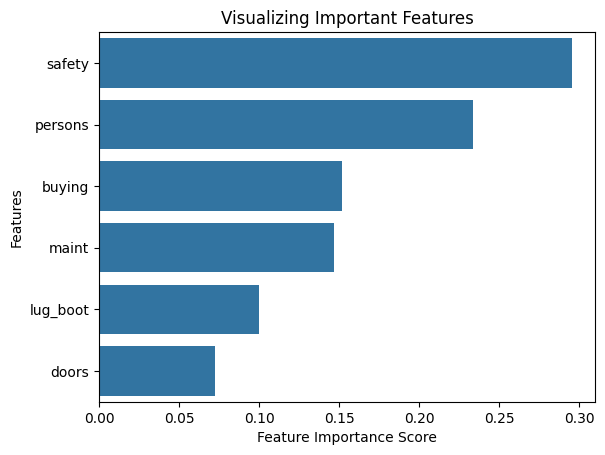

In [ ]:
sns.barplot(x=feature_scores, y=feature_scores.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

plt.show()

# **16. Обучение классификатора Random Forest на выбранных признаках**


Теперь исключим наименее важный признак `doors`, переобучим модель и проверим его влияние на точность.

In [ ]:
X = df.drop(['class', 'doors'], axis=1)

y = df['class']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [ ]:
clf = RandomForestClassifier(n_estimators=10, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Оценка точности модели при удалении признака "doors" : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Оценка точности модели при удалении признака "doors" : 0.9264


* Точность модели после исключения признака `doors` составляет: 0,9264. Точность модели с учетом всех признаков была: 0,9247. Таким образом, мы видим, что точность модели повысилась.

* Вторым наименее важным признаком является `lug_boot`. Если исключить его и переобучить модель, то точность окажется равной 0,8546. Это значительное снижение точности. Поэтому её удалять мы не будем.

На основании проведенного анализа можно сделать вывод, что точность нашей классификационной модели очень высока. Наша модель очень хорошо справляется с предсказанием меток классов.

Однако она не возвращает нам базового распределения значений. Также она ничего не говорит о типе ошибок, которые допускает наш классификатор.

На помощь нам приходит другой инструмент, называемый `Confusion matrix` (Матрица ошибок)





# **17. Матрица ошибок (Confusion Matrix)**

**Матрица ошибок** — это инструмент для оценки качества моделей классификации. Она сравнивает реальные значения с предсказанными моделью и показывает, где модель совершает ошибки. Матрица выглядит так:

```
                          | Предсказано Положительное | Предсказано Отрицательное
---------------------------------------------------------------------------------
Фактически Положительное  |        True Positive (TP) |       False Negative (FN)
Фактически Отрицательное  |       False Positive (FP) |        True Negative (TN)
```

**Компоненты матрицы:**

1. **True Positive (TP)**: модель верно предсказала положительный класс.
2. **True Negative (TN)**: модель верно предсказала отрицательный класс.
3. **False Positive (FP)**: модель ошибочно предсказала положительный класс для отрицательного примера (ложное сраатывание).
4. **False Negative (FN)**: модель ошибочно предсказала отрицательный класс для положительного примера (пропуск).

Матрица ошибок позволяет вычислить важные метрики:

- **Точность (Precision)**: доля верно предсказанных положительных классов из всех предсказанных положительных.

  $ \text{Precision} = \frac{TP}{TP + FP} $

- **Полнота (Recall)**: доля верно предсказанных положительных классов из всех фактических положительных.

  $ \text{Recall} = \frac{TP}{TP + FN} $

- **F1-мера**: гармоническое среднее между точностью и полнотой.

  $ F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $

Матрица ошибок помогает понять, насколько эффективно модель различает классы, и выявить области для улучшения модели.ть области для улучшения модели.слять другие метрики, такие как точность (precision), полнота (recall) и F1-мера. Они часто используются в задачах классификации для оценки производительности модели и подстройки их параметров.

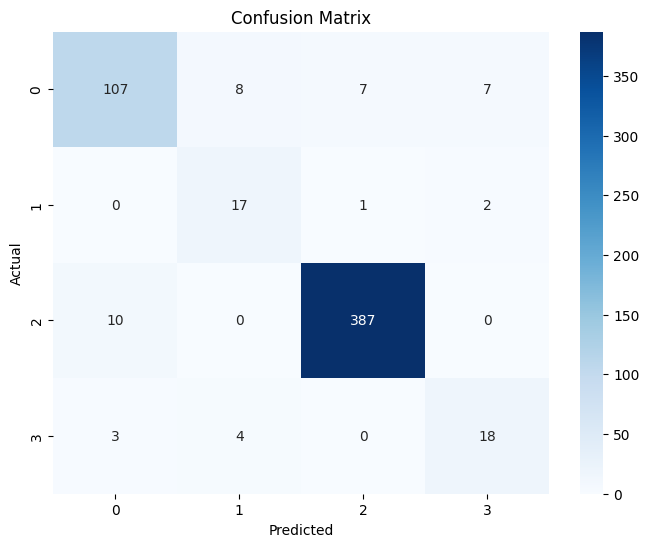

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt=".0f", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **18. Отчет о классификации**

**Отчет о классификации** предоставляет ключевые метрики качества модели для каждого класса: **точность** (precision), **полноту** (recall), **F1-меру** (f1-score) и **support** (количество образцов каждого класса в истинных значениях). Он также включает усредненные значения этих метрик.

Пример отчета:

```
             precision    recall  f1-score   support

      class 0       0.67      0.80      0.73        10
      class 1       0.83      0.71      0.77        14
      class 2       0.55      0.73      0.63        15

   micro avg       0.70      0.75      0.72        39
   macro avg       0.68      0.75      0.71        39
weighted avg       0.71      0.75      0.72        39
```

**Метрики:**

- **Precision (точность)**: доля верно предсказанных положительных результатов из всех предсказанных положительных.

- **Recall (полнота)**: доля верно предсказанных положительных результатов из всех фактических положительных.

- **F1-score (F1-мера)**: гармоническое среднее между точностью и полнотой, учитывающее баланс между ними.

- **Support**: количество образцов каждого класса в истинных данных.

**Средние значения:**

- **Micro avg**: усреднение метрик по всем образцам, учитывает общий вклад каждого класса.

- **Macro avg**: простое среднее метрик по классам, не учитывает дисбаланс классов.

- **Weighted avg**: среднее метрик по классам с учетом количества образцов в каждом классе, учитывает дисбаланс.

**Отчет о классификации** помогает быстро оценить производительность модели по основным метрикам и понять, как она справляется с каждым классом.


Более подробно об этом можно почитать [тут](https://habr.com/ru/companies/ods/articles/328372/)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.89      0.83      0.86       129
        good       0.59      0.85      0.69        20
       unacc       0.98      0.97      0.98       397
       vgood       0.67      0.72      0.69        25

    accuracy                           0.93       571
   macro avg       0.78      0.84      0.81       571
weighted avg       0.93      0.93      0.93       571



# 19. Подбор гиперпараметров Random Forest

## I. Randomized Search Cross Validation

### **Пара слов про кросс-валидацию...**

- **Кросс-валидация** (Cross Validation) — это метод оценки качества модели машинного обучения, который помогает определить, насколько хорошо модель будет работать на новых, неиспользованных данных. Она заключается в разделении исходных данных на несколько частей (называемых фолдами), и последовательном обучении и тестировании модели на разных комбинациях этих частей.



**Простой пример:**

Представьте, что у вас есть набор данных из 100 образцов. Вы хотите проверить, насколько хорошо ваша модель будет предсказывать результаты на новых данных. Применим **k-fold кросс-валидацию** с **k = 5**:

1. **Разбиение данных:**
   - Разделите данные на 5 раных частей по 20 образцов.

2. **Итеративное обучение и тестирование:**
   - **Итерация 1:**
     - Обучите модель на частях 1-4 (80 образцов).
     - Протестируйте модель на части 5 (20 образцов).
   - **Итерация 2:**
     - Обучите модель на частях 1-3 и 5.
     - Протестируйте на части 4.
   - **Итерации 3-5:**
     - Повторите процесс, каждый раз оставляя одну из частей для тестирования, а остальные используйте для обучения.

3. **Оценка качества:**
   - После каждой итерации фиксируйте качество модели (например, точность).
   - В конце вычислите среднее значение качества по всем итерациям.

**Преимущества кросс-валидации:**

- **Надёжность оценки:** Позволяет получить более стабильную и надёжную оценку качества модели, учитывая вариативность данных.
- **Предотвращение переобучения:** Помогает выявить и избежать ситуаций, когда модель хорошо работает на обучающих данных, но плохо — на новых.
- **Оптимизация модели:** Используется для подбора гиперпараметров и выбора наилучшей модели среди нескольких.

**Итого**, кросс-валидация — это важный инструмент в машинном обучении, который помогает оценить и улучшить модель, гарантируя, что она будет эффективно работать на реальных данных.

### **Вернемся к RandomizedSearchCV:**

**RandomizedSearchCV** — это метод случайного поиска гиперпараметров для моделей машинного обучения. В отличие от GridSearchCV, который перебирает все возможные комбинации, RandomizedSearchCV случайным образом выбирает комбинации гиперпараметров из заданных распределений. Это ускоряет процесс оптимизации и снижает риск переобучения, особенно при большом количестве гиперпараметров.

**Основные параметры RandomizedSearchCV:**

1. **estimator**: модель, которую нужно обучить.
2. **param_distributions**: словарь параметров с числовыми диапазонами, из которых случайно выбираются значения.
3. **n_iter**: количество итераций поиска (число случайных комбинаций параметров).
4. **scoring**: метрика для оценки качества моделей (строка с названием метрики или функция).
5. **cv**: число фолдов для кросс-валидации (по умолчанию 5).
6. **random_state**: начальное состояние генератора случайных чисел для воспроизводимости результатов.
7. **n_jobs**: количество параллельных задач (-1 использует все доступные ядра процессора).
8. **verbose**: уровень подробности вывода информации о процессе обучения.
9. **refit**: если `True`, модель переобучается на всех данных с лучшими найденными параметрами.
10. **return_train_score**: если `True`, возвращает оценки на обучающем наборе данных.
11. **error_score**: способ обработки ошибок при оценке модели (`'raise'` для выброса исключения или числовое значение).
12. **pre_dispatch**: количество задач для предварительной отправки в очередь выполнения.

**RandomizedSearchCV** возвращает модель с оптимальными гиперпараметрами, готовую для предсказания на новых данных.

> **RandomizedSearchCV** — эффективный инструмент для оптимизации гиперпараметров, который позволяет быстро найти наилучшую модель машинного обучения. Он ускоряет процесс обучения и улучшает качество моделей, эффективно исследуя пространство параметров.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Определяем список значений для параметра n_estimators (количество деревьев в лесу)
n_estimators = [int(x) for x in np.linspace(start=100, stop=500, num=10)]

# Определяем список значений для параметра max_depth (максимальная глубина дерева)
max_depth = [int(x) for x in np.linspace(10, 500, num=5)]
max_depth.append(None)  # Добавляем значение None для отсутствия ограничения глубины

# Определяем список значений для параметра max_leaf_nodes (максимальное количество листовых узлов)
max_leaf_nodes = [int(i) for i in range(1, 100)]

# Определяем пространство гиперпараметров для случайного поиска
random_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'max_leaf_nodes': max_leaf_nodes,
}

# Создаем модель классификатора случайного леса с фиксированным random_state для воспроизводимости
rf_clf = RandomForestClassifier(random_state=0)

# Инициализируем RandomizedSearchCV для поиска оптимальных гиперпараметров
rf_cv = RandomizedSearchCV(
    estimator=rf_clf,                # модель для настройки
    param_distributions=random_grid, # словарь с параметрами для случайного поиска
    n_iter=300,                      # количество итераций (случайных наборов гиперпараметров)
    scoring='accuracy',              # метрика для оценки качества моделей
    cv=5,                            # количество фолдов для кросс-валидации
    verbose=1,                       # уровень детализации вывода
    random_state=42,                 # фиксированный сид для воспроизводимости результатов
    n_jobs=-1                        # использование всех доступных ядер процессора
)

# Обучаем модель RandomizedSearchCV на обучающих данных с перебором гиперпараметров
rf_cv.fit(X_train, y_train)

# Получаем оптимальные гиперпараметры после поиска
rf_best_params = rf_cv.best_params_
print(f"Лучшие параметры: {rf_best_params}")

# Создаем новый классификатор случайного леса с оптимальными гиперпараметрами
rf_clf = RandomForestClassifier(**rf_best_params)

# Обучаем модель с оптимальными гиперпараметрами на обучающих данных
rf_clf.fit(X_train, y_train)

# Предсказываем классы для тестовых данных
y_pred = rf_clf.predict(X_test)

# Выводим оценку точности модели на тестовых данных
print('Оценка точности модели при подборе параметров с помощью RandomizedSearchCV: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Лучшие параметры: {'n_estimators': 188, 'max_leaf_nodes': 76, 'max_depth': 500}
Оценка точности модели при подборе параметров с помощью RandomizedSearchCV: 0.9299


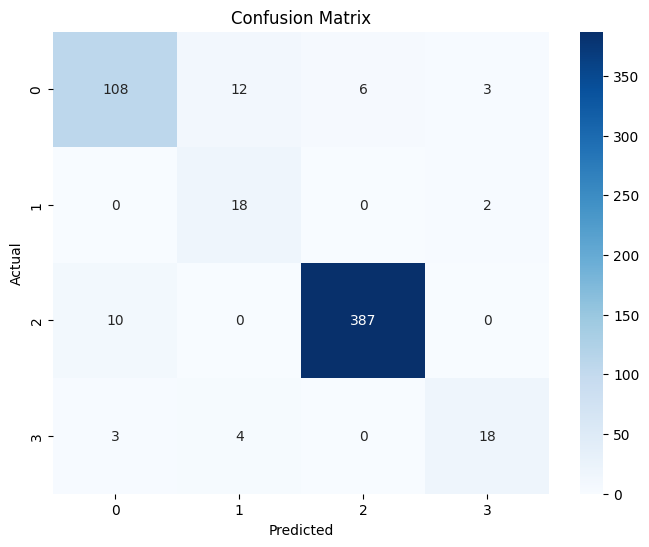

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt=".0f", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.89      0.84      0.86       129
        good       0.53      0.90      0.67        20
       unacc       0.98      0.97      0.98       397
       vgood       0.78      0.72      0.75        25

    accuracy                           0.93       571
   macro avg       0.80      0.86      0.82       571
weighted avg       0.94      0.93      0.93       571



`RandomizedSearchCV` позволил нам сузить диапазон для каждого гиперпараметра. Теперь, когда мы знаем, где сосредоточить поиск, мы можем явно указать все комбинации параметров, которые необходимо попробовать. Для этого используется метод `GridSearchCV`, который вместо случайной выборки из распределения оценивает все заданные нами комбинации.

## II. GridSearchCV

**GridSearchCV** — инструмент из библиотеки scikit-learn для подбора оптимальных гиперпараметров модели через перебор **ВСЕХ** заданных комбинаций с использованием кросс-валидации. Он помогает найти наилучшие параметры для улучшения качества модели.

**Основные параметры GridSearchCV:**

1. **estimator**: модель, для которой настраиваются гиперпараметры (должна соответствовать интерфейсу оценщика scikit-learn).
2. **param_grid**: словарь или список словарей с параметрами и их возможными значениями для перебора.
3. **scoring**: метрика для оценки качества модели; если не указано, используется метод `score` по умолчанию.
4. **cv**: стратегия кросс-валидации; по умолчанию 5-кратная.
5. **refit**: если `True`, модель переобучается на всех данных с лучшими найденными параметрами (по умолчанию `True`).
6. **verbose**: уровень детализации вывода; чем больше значение, тем подробнее информация.
7. **n_jobs**: число параллельных задач; `-1` использует все доступные ядра процессора.
8. **return_train_score**: если `True`, возвращает оценки на обучающих данных; по умолчанию `False`.

**Как работает GridSearchCV:**

- Метод `fit` перебирает все комбинации параметров из `param_grid`, обучает модель на каждой из них и оценивает качество по метрике `scoring`.
- По завершении поиска возвращается модель с наилучшими параметрами.

**Результат:**

GridSearchCV предоставляет информацию о лучшей модели и ее оптимальных параметрах, найденных в процессе перебора.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Определяем список значений для параметра n_estimators (количество деревьев)
n_estimators = [int(i) for i in range(1, 200)]

# Определяем список значений для параметра max_depth (максимальная глубина дерева)
max_depth = [100, 150, 200, 250, 300, 350, 400, 450, 500]
max_depth.append(None)  # Добавляем значение None для отсутствия ограничения глубины

# Определяем список значений для параметра max_leaf_nodes (максимальное количество листьев)
max_leaf_nodes = [int(i) for i in range(1, 100)]

# Создаем словарь с параметрами для перебора в GridSearchCV
params_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'max_leaf_nodes': max_leaf_nodes,
}

# Инициализируем классификатор случайного леса с фиксированным random_state для воспроизводимости
rf_clf = RandomForestClassifier(random_state=0)

# Настраиваем GridSearchCV для поиска наилучших гиперпараметров
rf_cv = GridSearchCV(
    estimator=rf_clf,        # модель для настройки
    param_grid=params_grid,  # словарь с параметрами для перебора
    scoring="accuracy",      # метрика для оценки качества моделей
    cv=5,                    # количество фолдов для кросс-валидации
    verbose=1,               # уровень детализации вывода
    n_jobs=-1                # использование всех доступных ядер процессора
)

# Обучаем модель GridSearchCV на обучающих данных
rf_cv.fit(X_train, y_train)

# Получаем лучшие найденные параметры
best_params = rf_cv.best_params_
print(f"Лучшие параметры: {best_params}")

# Обучаем окончательную модель с лучшими параметрами на обучающих данных
rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

# Предсказываем классы для тестовых данных
y_pred = rf_clf.predict(X_test)

# Выводим оценку точности модели на тестовых данных
print('Оценка точности модели при подборе параметров с помощью GridSearchCV: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Fitting 5 folds for each of 2850 candidates, totalling 14250 fits
Лучшие параметры: {'max_depth': 100, 'max_leaf_nodes': 19, 'n_estimators': 147}
Оценка точности модели при подборе параметров с помощью GridSearchCV: 0.9370


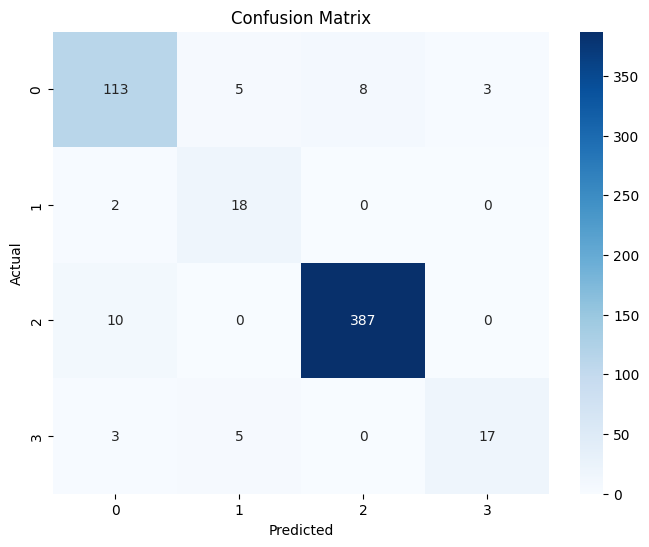

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt=".0f", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.88      0.88      0.88       129
        good       0.64      0.90      0.75        20
       unacc       0.98      0.97      0.98       397
       vgood       0.85      0.68      0.76        25

    accuracy                           0.94       571
   macro avg       0.84      0.86      0.84       571
weighted avg       0.94      0.94      0.94       571



**Прогресс обучения модели:**

1. Оценка точности модели при использовании 10 деревьев решений (остальные параметры по-умолчанию): 0.9244

2. Оценка точности модели при использовании 100 деревьев решений (остальные параметры по-умолчанию): **0.9457**

3. Оценка точности модели при использовании 10 деревьев и удалении признака "doors" : 0.9264

4. Оценка точности модели при подборе параметров с помощью RandomizedSearchCV : 0.9299
- Лучшие параметры: {'n_estimators': 188, 'max_leaf_nodes': 76, 'max_depth': 500}


5. Оценка точности модели при подборе параметров с помощью GridSearchCV : **0.9370**
- Лучшие параметры: {'max_depth': 100, 'max_leaf_nodes': 19, 'n_estimators': 147}